<a href="https://colab.research.google.com/github/CyberBantu/Analise_CensoEscolar_RJ/blob/main/Analise_dados_CensoEscolar_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analise Microdados Censo Escolar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dados = pd.read_csv('/content/drive/MyDrive/microdados_ed_basica_2021.csv', sep = ';', encoding = 'latin1')
dados.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,0.0,0.0,0.0,0.0,11.0,7.0,4.0,5.0,5.0,0.0
2,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0
4,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0


In [4]:
# Vendo quais estados estao nos dados
dados['SG_UF'].unique()

array(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

In [5]:
# Filtrando base para RJ
base = dados.query("SG_UF == 'RJ'")

In [6]:
# Passando para CSV -- Fiz para poder ter o arquivo men
base.to_csv("censo_escola_rj.csv", sep = ';', encoding='latin')

In [7]:
base = pd.read_csv('censo_escola_rj.csv', sep = ';', encoding = 'latin')
base.head()

,Unnamed: 0,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,133192,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,10.0,20.0,0.0,0.0,8.0,0.0,8.0,20.0,20.0,0.0
1,133193,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0
2,133194,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,4.0,8.0,2.0,2.0,4.0,0.0,4.0,6.0,6.0,0.0
3,133195,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,7.0,32.0,13.0,13.0,0.0,0.0,0.0,29.0,29.0,0.0
4,133196,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,8.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0


### Olhando para numeros absolutos da Rede de Escolas e Abastecimento de Água de Rede Publica

In [8]:
# Tratando as informações de dependencia e agrupando para contar
dependencia = {1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada'}
agua_rede_publica = {1: 'Sim', 0: 'Não'}
base['IN_AGUA_REDE_PUBLICA'] = base['IN_AGUA_REDE_PUBLICA'].map(agua_rede_publica)
base['TP_DEPENDENCIA'] = base['TP_DEPENDENCIA'].map(dependencia)
base_dependencia = base.groupby(['TP_DEPENDENCIA', 'IN_AGUA_REDE_PUBLICA'])['NO_ENTIDADE'].count().reset_index()
base_dependencia

,TP_DEPENDENCIA,IN_AGUA_REDE_PUBLICA,NO_ENTIDADE
0,Estadual,Não,64
1,Estadual,Sim,1218
2,Federal,Não,4
3,Federal,Sim,56
4,Municipal,Não,727
5,Municipal,Sim,4629
6,Privada,Não,230
7,Privada,Sim,4516


In [9]:
def grafico_barra(base,colunax, colunay, hue2 = None):
    a= sns.catplot(data = base, x = colunax, y = colunay, kind = 'bar', hue = hue2, legend=False)

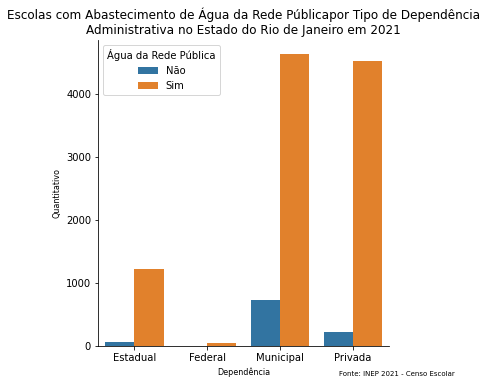

In [ ]:
# Plotando Grafico
grafico_barra(base_dependencia,'TP_DEPENDENCIA', 'NO_ENTIDADE', 'IN_AGUA_REDE_PUBLICA')

plt.title('''Escolas com Abastecimento de Água da Rede Públicapor Tipo de Dependência
Administrativa no Estado do Rio de Janeiro em 2021''',
          size = 12, loc='center')
plt.suptitle('Fonte: INEP 2021 - Censo Escolar', x = 0.99, y = 0.05, size = 7)
plt.xlabel('Dependência', size = 8)
plt.ylabel('Quantitativo', size = 8)
plt.legend(title = 'Água da Rede Pública') # Legenda dentro do seaborn

### Dependencia e Aprendizagem

In [ ]:
## Aprendizagem por Dependência
internet_aprendizagem = {0: 'Não', 1: 'Sim'}
base['IN_INTERNET_APRENDIZAGEM'] = base['IN_INTERNET_APRENDIZAGEM'].map(internet_aprendizagem)
base_internet_aprendizagem = base.groupby(['TP_DEPENDENCIA', 'IN_INTERNET_APRENDIZAGEM'])['NO_ENTIDADE'].count().reset_index()
base_internet_aprendizagem

,TP_DEPENDENCIA,IN_INTERNET_APRENDIZAGEM,NO_ENTIDADE
0,Estadual,Não,434
1,Estadual,Sim,848
2,Federal,Não,7
3,Federal,Sim,53
4,Municipal,Não,3140
5,Municipal,Sim,2216
6,Privada,Não,1953
7,Privada,Sim,2793


In [ ]:
# Teste
#base_internet_aprendizagem['porcentagem'] = round(base_internet_aprendizagem['NO_ENTIDADE'] / sum(base_internet_aprendizagem['NO_ENTIDADE']),2)*100
#base_internet_aprendizagem

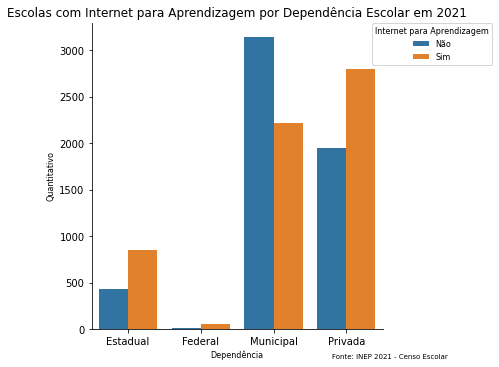

In [ ]:
# Grafico Aprendizagem
a = grafico_barra(base_internet_aprendizagem, 'TP_DEPENDENCIA', 'NO_ENTIDADE', 'IN_INTERNET_APRENDIZAGEM')
plt.title('Escolas com Internet para Aprendizagem por Dependência Escolar em 2021', loc = 'center')
plt.suptitle('Fonte: INEP 2021 - Censo Escolar', x = 0.99, y = 0.05, size = 7)
plt.xlabel('Dependência', size = 8)
plt.ylabel('Quantitativo', size = 8)
plt.legend(title = 'Internet para Aprendizagem', bbox_to_anchor=(0.95, 0.85), fontsize = 8, title_fontsize = 8) # Posição da legenda

##### Escolas Totais sem Internet para aprendizagem

In [ ]:
escolas_aprendizagem_total = base['IN_INTERNET_APRENDIZAGEM'].value_counts().reset_index()
escolas_aprendizagem_total['Porcentagem'] = round(escolas_aprendizagem_total['IN_INTERNET_APRENDIZAGEM'] / sum(escolas_aprendizagem_total['IN_INTERNET_APRENDIZAGEM'])*100,2)

In [ ]:
escolas_aprendizagem_total
print('48,36% das Escolas não possuem internet para aprendizagem')

48,36% das Escolas não possuem internet para aprendizagem


### Esgoto nas escolas do Estado

In [ ]:
base_esgoto = base['IN_ESGOTO_INEXISTENTE'].value_counts().reset_index() # Olhando os dados de esgotamento

In [ ]:
# Preparando a porcentagem
base_esgoto['Porcentagem'] = round(base_esgoto['IN_ESGOTO_INEXISTENTE'] / sum(base_esgoto['IN_ESGOTO_INEXISTENTE'])*100,2)
print('0,32% das Escolas te esgoto inexistente')

0,32% das Escolas te esgoto inexistente


In [ ]:
base_esgoto

,index,IN_ESGOTO_INEXISTENTE,Porcentagem
0,0.0,11407,99.68
1,1.0,37,0.32


In [ ]:
esgoto_inexistente = base.query("IN_ESGOTO_INEXISTENTE == 1")

In [ ]:
esgoto_inexistente.groupby(['NO_MUNICIPIO','TP_DEPENDENCIA'])['IN_ESGOTO_INEXISTENTE'].count().reset_index().sort_values(by = 'IN_ESGOTO_INEXISTENTE', ascending = False).head()

,NO_MUNICIPIO,TP_DEPENDENCIA,IN_ESGOTO_INEXISTENTE
24,São Gonçalo,Privada,3
13,Magé,Municipal,3
4,Campos dos Goytacazes,Privada,2
21,Rio de Janeiro,Privada,2
14,Maricá,Privada,2


In [ ]:
print('Os Municipios com maior numero de escolas com Esgotamento Inexistente são São Gonçalo e Magé, com 3 Escolas Cada')

Os Municipios com maior numero de escolas com Esgotamento Inexistente são São Gonçalo e Magé, com 3 Escolas Cada


## Analisando dados para baixada Fluminense

In [ ]:
base['NO_MUNICIPIO'].unique() # Observando quais são os municipios

array(['Angra dos Reis', 'Aperibé', 'Araruama', 'Areal',
       'Armação dos Búzios', 'Arraial do Cabo', 'Barra do Piraí',
       'Barra Mansa', 'Belford Roxo', 'Bom Jardim',
       'Bom Jesus do Itabapoana', 'Cabo Frio', 'Cachoeiras de Macacu',
       'Cambuci', 'Carapebus', 'Comendador Levy Gasparian',
       'Campos dos Goytacazes', 'Cantagalo', 'Cardoso Moreira', 'Carmo',
       'Casimiro de Abreu', 'Conceição de Macabu', 'Cordeiro',
       'Duas Barras', 'Duque de Caxias', 'Engenheiro Paulo de Frontin',
       'Guapimirim', 'Iguaba Grande', 'Itaboraí', 'Itaguaí', 'Italva',
       'Itaocara', 'Itaperuna', 'Itatiaia', 'Japeri', 'Laje do Muriaé',
       'Macaé', 'Macuco', 'Magé', 'Mangaratiba', 'Maricá', 'Mendes',
       'Mesquita', 'Miguel Pereira', 'Miracema', 'Natividade',
       'Nilópolis', 'Niterói', 'Nova Friburgo', 'Nova Iguaçu',
       'Paracambi', 'Paraíba do Sul', 'Paraty', 'Paty do Alferes',
       'Petrópolis', 'Pinheiral', 'Piraí', 'Porciúncula', 'Porto Real',
       'Q

In [10]:
# Filtrando os dados
baixada = base.query("CO_MUNICIPIO == (3301702, 3302502, 3300456,3302007,3302270,3303203,3303500,3303609,3304144,3305554,3301850,3305109,3302858)")

In [11]:
baixada['NO_MUNICIPIO'].unique()

array(['Belford Roxo', 'Duque de Caxias', 'Guapimirim', 'Itaguaí',
       'Japeri', 'Magé', 'Mesquita', 'Nilópolis', 'Nova Iguaçu',
       'Paracambi', 'Queimados', 'São João de Meriti', 'Seropédica'],
      dtype=object)

In [12]:
baixada.shape

(2506, 371)

In [13]:
baixada_dependencia = baixada.groupby(['TP_DEPENDENCIA'])['NO_ENTIDADE'].count().reset_index()

In [ ]:
baixada_dependencia

,TP_DEPENDENCIA,NO_ENTIDADE
0,Estadual,360
1,Federal,10
2,Municipal,907
3,Privada,1229


Text(0.99, 0.05, 'Fonte: INEP 2021 - Censo Escolar')

<Figure size 1152x504 with 0 Axes>

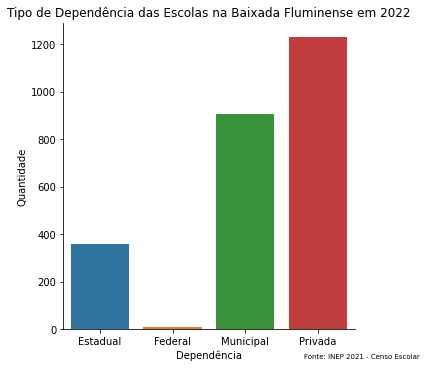

In [14]:
plt.figure(figsize=(16,7))
grafico_barra(baixada_dependencia,'TP_DEPENDENCIA', 'NO_ENTIDADE')
plt.title(label = 'Tipo de Dependência das Escolas na Baixada Fluminense em 2022')
plt.xlabel('Dependência')
plt.ylabel('Quantidade')
plt.suptitle('Fonte: INEP 2021 - Censo Escolar', x = 0.99, y = 0.05, size = 7)

In [15]:
# Internet para aprendizagem na Baixada
escolas_aprendizagem_total_baixada = baixada['IN_INTERNET_APRENDIZAGEM'].value_counts().reset_index()
escolas_aprendizagem_total_baixada['Porcentagem'] = round(escolas_aprendizagem_total_baixada['IN_INTERNET_APRENDIZAGEM'] / sum(escolas_aprendizagem_total_baixada['IN_INTERNET_APRENDIZAGEM'])*100,2)

In [16]:
escolas_aprendizagem_total_baixada

,index,IN_INTERNET_APRENDIZAGEM,Porcentagem
0,0.0,1232,52.67
1,1.0,1107,47.33


In [ ]:
print('52,67 % das Escolas da baixada não tem internet para aprendizagem')

52,67 % das Escolas da baixada não tem internet para aprendizagem


In [23]:
baixada_sem_internet = baixada.query("IN_INTERNET_APRENDIZAGEM == 0")
baixada_sem_net = baixada_sem_internet[['NO_MUNICIPIO', 'TP_DEPENDENCIA']].value_counts().reset_index().rename(columns = {0 : 'qtd'})
baixada_sem_net['porc'] = round(baixada_sem_net['qtd'] / baixada_sem_net['qtd'].sum()*100,2)

In [25]:
baixada_sem_net.head()

,NO_MUNICIPIO,TP_DEPENDENCIA,qtd,porc
0,Nova Iguaçu,Privada,140,11.36
1,Duque de Caxias,Privada,129,10.47
2,Nova Iguaçu,Municipal,107,8.69
3,São João de Meriti,Privada,87,7.06
4,Belford Roxo,Municipal,77,6.25


In [31]:
baixada_sem_net.groupby(['NO_MUNICIPIO'])['porc'].sum().reset_index().sort_values(by = 'porc', ascending = False)

,NO_MUNICIPIO,porc
8,Nova Iguaçu,21.84
1,Duque de Caxias,19.72
0,Belford Roxo,12.58
12,São João de Meriti,11.93
5,Magé,6.65
3,Itaguaí,5.93
7,Nilópolis,4.78
10,Queimados,3.90
11,Seropédica,3.41
6,Mesquita,2.84


* Olhando para as escolas que não tem internet para aprendizagem 21,84% 19,72% e 12.58% são de Nova Iguaçu, Duque de Caxias e Belford Roxo, respectivamente.

#### Água da Rede Publica nas escolas da Baixada
* IN_AGUA_REDE_PUBLICA

In [ ]:
agua_rd_publica_baixada = baixada['IN_AGUA_REDE_PUBLICA'].value_counts().reset_index()
agua_rd_publica_baixada['Porcentagem'] = round(agua_rd_publica_baixada['IN_AGUA_REDE_PUBLICA'] / sum(agua_rd_publica_baixada['IN_AGUA_REDE_PUBLICA'])*100,2)
agua_rd_publica_baixada

,index,IN_AGUA_REDE_PUBLICA,Porcentagem
0,Sim,2033,86.92
1,Não,306,13.08


In [ ]:
print('13,08% das Escolas da Baixada não é abastecida pela de Rede de Águas Públicas')

13,08% das Escolas da Baixada não é abastecida pela de Rede de Águas Públicas


In [ ]:
biblioteca_sala_leitura = baixada['IN_BIBLIOTECA_SALA_LEITURA'].value_counts().reset_index()
biblioteca_sala_leitura['Porcentagem'] = round(biblioteca_sala_leitura['IN_BIBLIOTECA_SALA_LEITURA'] / sum(biblioteca_sala_leitura['IN_BIBLIOTECA_SALA_LEITURA'])*100,2)
biblioteca_sala_leitura

,index,IN_BIBLIOTECA_SALA_LEITURA,Porcentagem
0,1.0,1782,76.19
1,0.0,557,23.81


In [ ]:
print('23,81 % das Escolas da Baixada Fluminense não tem Biblioteca ou Sala de Leituras')

23,81 % das Escolas da Baixada Fluminense não tem Biblioteca ou Sala de Leituras


In [ ]:
# Agrupando as informações acima para poder contabilizar por municipio
sem_biblioteca_sala_leitura = baixada.query("IN_BIBLIOTECA_SALA_LEITURA == 0")

In [ ]:
sem_biblioteca_sala_leitura = sem_biblioteca_sala_leitura.groupby(['NO_MUNICIPIO'])['IN_BIBLIOTECA_SALA_LEITURA'].count().reset_index().sort_values(by = 'IN_BIBLIOTECA_SALA_LEITURA', ascending = False)

In [ ]:
sem_biblioteca_sala_leitura

,NO_MUNICIPIO,IN_BIBLIOTECA_SALA_LEITURA
1,Duque de Caxias,114
12,São João de Meriti,80
5,Magé,78
8,Nova Iguaçu,71
0,Belford Roxo,66
6,Mesquita,28
3,Itaguaí,24
7,Nilópolis,24
11,Seropédica,18
2,Guapimirim,17


#### Analisando dados sobre o Censo Escolar na Baixada Fluminense

In [ ]:
base.head()

,Unnamed: 0,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,133192,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,10.0,20.0,0.0,0.0,8.0,0.0,8.0,20.0,20.0,0.0
1,133193,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0
2,133194,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,4.0,8.0,2.0,2.0,4.0,0.0,4.0,6.0,6.0,0.0
3,133195,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,7.0,32.0,13.0,13.0,0.0,0.0,0.0,29.0,29.0,0.0
4,133196,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,8.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0


In [ ]:
# Filtrando dados para baixada somente ativas
baixada = base.query('CO_MUNICIPIO == (3300456,3301702,3301850,3302007,3302270,3302502,3302858,3303203,3303500,3303609,3304144,3305109,3305554) & TP_SITUACAO_FUNCIONAMENTO == 1')
baixada['NO_MUNICIPIO'].unique()

array(['Belford Roxo', 'Duque de Caxias', 'Guapimirim', 'Itaguaí',
       'Japeri', 'Magé', 'Mesquita', 'Nilópolis', 'Nova Iguaçu',
       'Paracambi', 'Queimados', 'São João de Meriti', 'Seropédica'],
      dtype=object)

##### Escolas por Tipo de Dependência na Baixada Fluminense

In [ ]:
dp_baixada = baixada['TP_DEPENDENCIA'].value_counts().reset_index().rename(columns = {'index' : 'Dependência', 'TP_DEPENDENCIA' : 'qtd'})
dp_baixada['porcentagem'] = round(dp_baixada['qtd'] / dp_baixada['qtd'].sum()*100,2)

In [ ]:
dp_baixada

,Dependência,qtd,porcentagem
0,Privada,1109,47.41
1,Municipal,876,37.45
2,Estadual,345,14.75
3,Federal,9,0.38


Text(0.5, 1.0, 'Total de Escolas Ativas por Dependência na Baixada Fluminense')

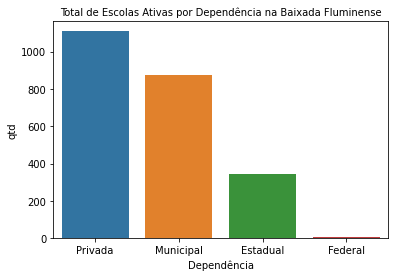

In [ ]:
sns.barplot(data = dp_baixada, x = 'Dependência',  y = 'qtd')
plt.title('Total de Escolas Ativas por Dependência na Baixada Fluminense', size = 10)

In [ ]:
import plotly.express as px


In [ ]:
fig = px.bar(dp_baixada, x='qtd', y='Dependência', labels={'qtd' : 'Quantidade'},
             height = 300, width= 600, text_auto=True)
fig.update_layout(title_text='Quantidade de Escolas por Dependência na Baixada Fluminese')
fig.update_traces(textfont_size=8, textfont_color = '#e3e8cd')


In [ ]:
# Grafico com Porcentagem
fig = px.pie(dp_baixada, values='porcentagem', names='Dependência', title='Quantidade de Escolas por Dependência na Baixada Fluminese',
             height = 400, width= 400, hole=.4)
fig

##### Água potavel - IN_AGUA_POTAVEL

In [ ]:
agua_potavel = baixada['IN_AGUA_POTAVEL'].value_counts().reset_index().replace(1,'Possui Água Potavel').replace(0,'Não Possui Água Potavel').rename(columns={'index':'agua', 'IN_AGUA_POTAVEL':'qtd'})
agua_potavel

,agua,qtd
0,Possui Água Potavel,2325
1,Não Possui Água Potavel,14


* Quais são essas 14 escolas?

In [ ]:
sem_agua_potavel = baixada.query("IN_AGUA_POTAVEL == 0")
sem_agua_potavel[['NO_MUNICIPIO', 'NO_ENTIDADE', 'TP_DEPENDENCIA']]

,NO_MUNICIPIO,NO_ENTIDADE,TP_DEPENDENCIA
843,Belford Roxo,CENTRO EDUCACIONAL PAPAI DO CEU,Privada
2226,Duque de Caxias,ESCOLA MUNICIPAL GENERAL SAMPAIO,Municipal
2709,Duque de Caxias,FUNDACAO BENEFICENTE EVANGELICA JESUS DE NAZARE,Privada
3118,Itaguaí,CENTRO EDUCACIONAL DIA FELIZ LTDA,Privada
3782,Magé,E M DR GETULIO VARGAS,Municipal
3783,Magé,E M DR MARIO PINHEIRO,Municipal
3787,Magé,CRECHE M LAR DE MAEZINHA,Municipal
3814,Magé,CRECHE MUNICIPAL PROFª ANA LUCIA MARTINS,Municipal
3818,Magé,CRECHE MUNICIPAL PROFª EDITH PIERI,Municipal
3852,Magé,CRECHE MUNICIPAL PROFESSORA ROSANGELA BELO DOS...,Municipal


##### Psicologos no Ambiente *Escolar*

In [ ]:
psicologos = baixada['IN_PROF_PSICOLOGO'].value_counts().reset_index().replace(0,'Não').replace(1,'Sim').rename(columns = {'index' : 'Psicologo', 'IN_PROF_PSICOLOGO' : 'Quantidade'})
psicologos['porcentagem'] = round(psicologos['Quantidade'] / psicologos['Quantidade'].sum()*100,2)
psicologos

,Psicologo,Quantidade,porcentagem
0,Não,2154,92.09
1,Sim,185,7.91


* 92% das escolas da Baixada Fluminense não contam com Apoio de nenhum profissional da Psicologia

In [ ]:
# Quantidade de escolas por municipio
escolas_com_psicologos = baixada[['NO_MUNICIPIO', 'NO_ENTIDADE','IN_PROF_PSICOLOGO']]
escola_psi = escolas_com_psicologos.groupby(['NO_MUNICIPIO','IN_PROF_PSICOLOGO']).count().reset_index().sort_values(by = 'NO_ENTIDADE', ascending = False)
escola_psi

,NO_MUNICIPIO,IN_PROF_PSICOLOGO,NO_ENTIDADE
2,Duque de Caxias,0.0,500
16,Nova Iguaçu,0.0,455
24,São João de Meriti,0.0,259
0,Belford Roxo,0.0,246
10,Magé,0.0,162
14,Nilópolis,0.0,104
12,Mesquita,0.0,87
6,Itaguaí,0.0,79
20,Queimados,0.0,69
22,Seropédica,0.0,62


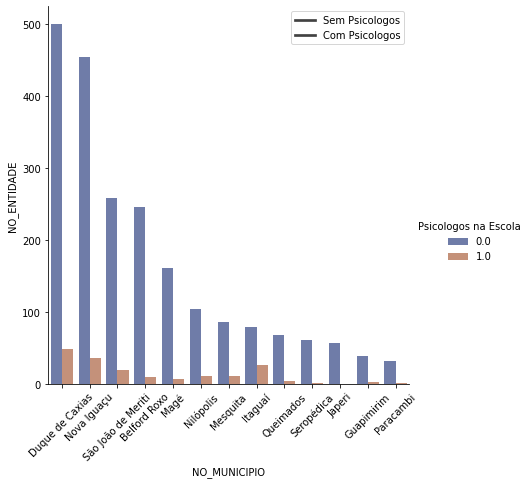

In [ ]:
#Grafico psicologo
g = sns.catplot(
    data=escola_psi, kind="bar",
    x="NO_MUNICIPIO", y="NO_ENTIDADE", hue="IN_PROF_PSICOLOGO", palette="dark", alpha=.6, height=6
)

plt.xticks(rotation = 45)
g.legend.set_title("Psicologos na Escola")
plt.legend(labels=['Sem Psicologos', 'Com Psicologos'])

##### Profissionais da Assistência social - IN_PROF_ASSIST_SOCIAL

In [ ]:
assist_social = baixada['IN_PROF_ASSIST_SOCIAL'].value_counts().reset_index().replace(0,'Não').replace(1,'Sim').rename(columns = {'index' : 'Assistente Social', 'IN_PROF_ASSIST_SOCIAL' : 'Quantidade'})
assist_social['porcentagem'] = round(assist_social['Quantidade'] / assist_social['Quantidade'].sum()*100,2)
assist_social

,Assistente Social,Quantidade,porcentagem
0,Não,2214,94.66
1,Sim,125,5.34


* 94,66% das Escolas na Baixada Não tem assistente social

#### Quantidade Escolas com Laboratório de Informática ba baixada


In [ ]:
# por Cidade da Baixada
labs_info_escolas = baixada[['NO_MUNICIPIO', 'NO_ENTIDADE','IN_LABORATORIO_INFORMATICA']]
labs_info_escolas_agrup = labs_info_escolas.groupby(['NO_MUNICIPIO','IN_LABORATORIO_INFORMATICA']).count().reset_index().sort_values(by = 'NO_ENTIDADE', ascending = False).rename(columns = {'NO_ENTIDADE' : 'Quantidade',                                                                                                                                                                'IN_LABORATORIO_INFORMATICA' : 'lab_info'})


In [ ]:
# Agrputamento total por Municipio
labs_muni = baixada[['NO_MUNICIPIO','IN_LABORATORIO_INFORMATICA']]
labs_muni = labs_muni.value_counts().reset_index().rename(columns = {0:'Total'})
labs_muni = labs_muni.groupby(['NO_MUNICIPIO'])['Total'].sum().reset_index()
labs_muni.head()

,NO_MUNICIPIO,Total
0,Belford Roxo,256
1,Duque de Caxias,549
2,Guapimirim,43
3,Itaguaí,106
4,Japeri,59


In [ ]:
#Vendo as alterações
labs_info_escolas_agrup.head()

,NO_MUNICIPIO,lab_info,Quantidade
3,Duque de Caxias,1.0,282
2,Duque de Caxias,0.0,267
16,Nova Iguaçu,0.0,247
17,Nova Iguaçu,1.0,245
0,Belford Roxo,0.0,144


In [ ]:
# Agrupando dados
df_labs_info = labs_info_escolas_agrup.merge(labs_muni)

In [ ]:
df_labs_info.head(3)

,NO_MUNICIPIO,lab_info,Quantidade,Total
0,Duque de Caxias,1.0,282,549
1,Duque de Caxias,0.0,267,549
2,Nova Iguaçu,0.0,247,492


In [ ]:
# criando porcentagem de escolas
df_labs_info['porc'] = round(df_labs_info['Quantidade'] / df_labs_info['Total']*100,2)

In [ ]:
# Obstervando as maiores porcentagem sem laboratório de informática
df_labs_info = df_labs_info.sort_values(by = 'porc', ascending = False)
df_labs_info.head(3)

,NO_MUNICIPIO,lab_info,Quantidade,Total,porc
20,Guapimirim,0.0,33,43,76.74
8,Magé,0.0,121,169,71.60
16,Queimados,0.0,50,73,68.49


* Porcentagem de Escolas Sem Laboratorio na Baixada

In [ ]:
sem_labs = df_labs_info.query("lab_info == 0")
sem_labs
#sem_labs = sem_labs['porc'].mean()
#print(f'Na Baixada {round(sem_labs,2)}% das Escolas não tem Laboratório de Informática')

,NO_MUNICIPIO,lab_info,Quantidade,Total,porc
20,Guapimirim,0.0,33,43,76.74
8,Magé,0.0,121,169,71.60
16,Queimados,0.0,50,73,68.49
18,Seropédica,0.0,40,64,62.50
4,Belford Roxo,0.0,144,256,56.25
14,Mesquita,0.0,52,99,52.53
6,São João de Meriti,0.0,144,279,51.61
2,Nova Iguaçu,0.0,247,492,50.20
1,Duque de Caxias,0.0,267,549,48.63
13,Nilópolis,0.0,55,115,47.83


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

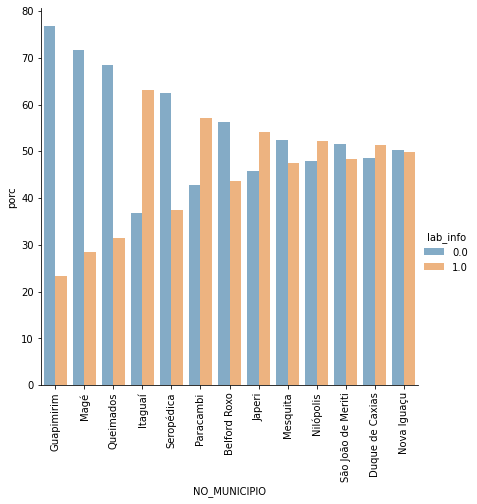

In [ ]:
g1 = sns.catplot(data=df_labs_info, kind="bar",
    x="NO_MUNICIPIO", y="porc", hue="lab_info", alpha=.6, height=6)
plt.xticks(rotation = 90)

* Os Municípios com maior destaque de falta de Laboratórios de Informática são **Guapimirim, Magé e Queimados** com **76,74%, 71,60% e 68,49**% respectivamente.